Sparks Foundation GRIP - May 2023

Role : The Data science and Business Analytics Intern

Author : Gayatri Lohar

Task 1 : Prediction using Supervised ML

Problem Statement : What will be the predicted score if the student studies for 9.25 hr/day?

Dataset link=http://bit.ly/w-data

In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
data = pd.read_csv (r'C:\Users\gayat\OneDrive\Documents\Data\Task1.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
#checking missing values
data.isnull().values.any()

False

# Exploring the Data

In [6]:
print("Statistical Summary")
data.describe()

Statistical Summary


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the Data

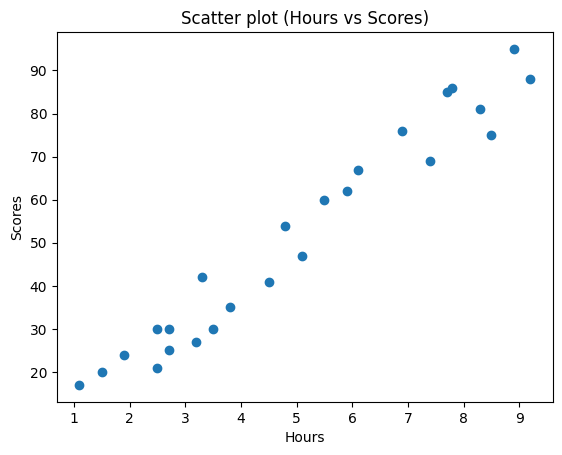

In [7]:
plt.scatter(data.Hours,data.Scores)
plt.title("Scatter plot (Hours vs Scores)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [8]:
#check correlation between Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Conclusion: From above scatter plot we see that most of points are linearly correlated, so we can use Simple_linear_Regression and correlation between Hours & Scores is 0.976191 so both are positively(strongly) correlated to each others.

# Simple Linear Regression

In [11]:
#splitting data in x and y
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [12]:
#The next step is to split this data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=1)

In [13]:
#Train the algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Training completed')

Training completed


In [14]:
#fitted model
y_hat=model.coef_*x+model.intercept_
print("slope=",model.coef_)
print("intercept=",model.intercept_)

slope= [10.33097478]
intercept= -0.8005598320503893


<function matplotlib.pyplot.show(close=None, block=None)>

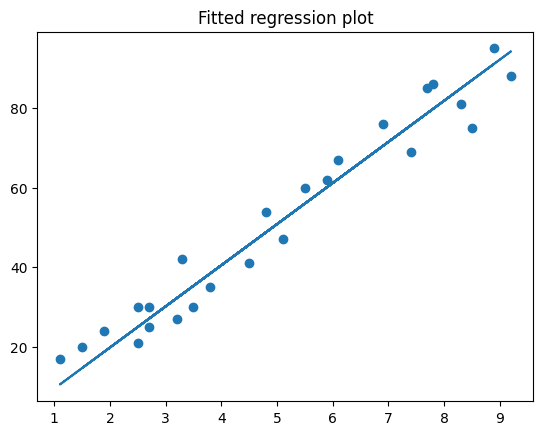

In [15]:
#ploting the regression line
plt.scatter(x, y)
plt.plot(x,y_hat);
plt.title('Fitted regression plot')
plt.show

In [16]:
y_pred = model.predict(x_test)  #predicted value of y
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  # Comparing Actual vs Predicted
df   

,Actual,Predicted
0,17,10.563512
1,42,33.291657
2,24,18.828292
3,75,87.012726
4,54,48.788119
5,85,78.747946
6,67,62.218386
7,69,75.648654
8,30,35.357852


In [17]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,y_pred)
print(R_square)

0.9047140370739193


In [18]:
# using the classic method to calculate the Adjacent R Square
adjusted_r_squared = 1 - (1-R_square)*(len(y)-1)/(len(y)-x.shape[1]-1)

print("Adjacent R_square:", adjusted_r_squared)

Adjacent R_square: 0.9005711691206114


# What will be the predicted score if the student studies for 9.25 hr/day?
# Predicting the score for 9.25 hours

In [19]:
hours= 9.25
pred=model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.76095689811575


In [20]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6.731257577459276


# From our linear regression model, if students study for 9.25 hours/day they will score '94.76' marks.

# Thank You...